In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [2]:
df = pd.read_csv('./data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df = df.dropna()
df = df.drop('CUST_ID', axis = 1)

df.isna().sum()
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [6]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric = 'euclidean'))

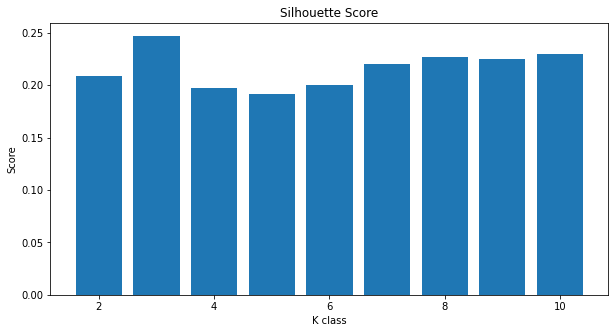

In [7]:
fig = plt.figure(figsize = (10, 5))
plt.bar([2,3,4,5,6,7,8,9,10], sil)
plt.xlabel("K class")
plt.ylabel("Score")
plt.title("Silhouette Score")
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3)
labels = kmeans.fit_predict(df_scaled)

In [10]:
len(labels)
res = df
res['cluster'] = labels
res

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [11]:
# dekomposisi PCA
dist = 1 - cosine_similarity(df_scaled)

pca = PCA(n_components = 2)
pca = pca.fit_transform(dist)
# X_PCA.shape

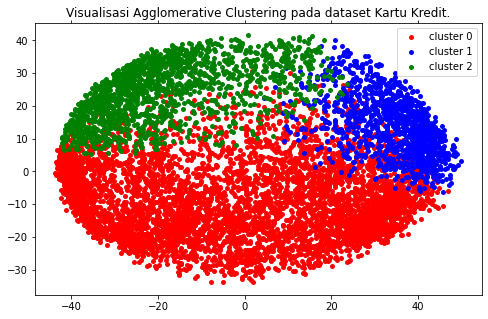

In [21]:
x, y = pca[:, 0], pca[:, 1]
warna = {0: 'red', 1: 'blue', 2: 'green'}
label_pca = {0: 'cluster 0', 1: 'cluster 1', 2: 'cluster 2'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(8, 5)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Visualisasi Agglomerative Clustering pada dataset Kartu Kredit.")
plt.show()

In [14]:
res_class0 = res.loc[res['cluster'] == 0]
res_class1 = res.loc[res['cluster'] == 1]
res_class2 = res.loc[res['cluster'] == 2]

In [18]:
res_class0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.0
mean,831.606099,0.859770,515.753154,257.446073,258.641772,334.285184,0.470784,0.134789,0.349010,0.070312,1.242967,8.830861,3264.812206,945.971348,541.155902,0.163213,11.501620,0.0
std,972.455246,0.235284,602.862783,486.687117,400.438387,658.757663,0.379574,0.222633,0.383629,0.108307,2.149303,9.586863,2642.232235,1114.582659,1318.364987,0.296045,1.352215,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.056466,0.019163,0.000000,6.000000,0.0
25%,68.156278,0.818182,60.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,316.143862,147.054838,0.000000,12.000000,0.0
50%,470.915050,1.000000,317.100000,0.000000,83.350000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2500.000000,596.476540,214.399847,0.000000,12.000000,0.0
75%,1277.423486,1.000000,757.800000,315.000000,374.380000,353.621982,0.833333,0.166667,0.714286,0.090909,2.000000,12.000000,4000.000000,1164.770591,502.718043,0.181818,12.000000,0.0
max,8115.039014,1.000000,5080.850000,4900.000000,3200.000000,7894.578816,1.000000,1.000000,1.000000,0.714286,23.000000,111.000000,23000.000000,23150.571840,28483.254830,1.000000,12.000000,0.0


In [19]:
res_class1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.0
mean,2225.449783,0.982098,4281.452938,2723.221211,1558.722725,462.204156,0.949847,0.667159,0.746982,0.063548,1.542553,56.733224,7754.296236,4166.540810,1255.771972,0.299704,11.922259,1.0
std,2579.411806,0.069901,4288.674553,3643.305317,1870.394077,1332.757054,0.113088,0.312892,0.324126,0.134780,4.464005,43.106985,4357.407763,4749.249028,3705.241429,0.384102,0.535102,0.0
min,12.423203,0.181818,498.170000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,500.000000,66.610309,14.012997,0.000000,6.000000,1.0
25%,369.660812,1.000000,2148.100000,914.550000,479.252500,0.000000,0.916667,0.416667,0.583333,0.000000,0.000000,30.000000,4500.000000,1726.272258,190.888093,0.000000,12.000000,1.0
50%,1245.917412,1.000000,3138.585000,1789.000000,1091.535000,0.000000,1.000000,0.750000,0.916667,0.000000,0.000000,44.500000,7000.000000,2799.270987,386.089567,0.083333,12.000000,1.0
75%,3178.600866,1.000000,4794.955000,3216.957500,1940.975000,154.282038,1.000000,1.000000,1.000000,0.083333,1.000000,69.000000,10000.000000,4747.397954,1074.099146,0.666667,12.000000,1.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.0


In [20]:
res_class2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.0
mean,4022.794557,0.959874,386.584377,249.342337,137.321879,3912.397504,0.233436,0.111311,0.145499,0.450815,12.552615,5.620400,6732.669171,3080.127851,1779.021805,0.033740,11.352485,2.0
std,2691.901949,0.110321,742.442633,575.728370,352.289874,3415.454976,0.329145,0.202901,0.281725,0.220741,11.366088,10.767054,3760.776271,3988.818300,3554.324493,0.099333,1.509561,0.0
min,4.382924,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,16.950090,0.000000,6.000000,2.0
25%,1904.376436,1.000000,0.000000,0.000000,0.000000,1845.164653,0.000000,0.000000,0.000000,0.272727,6.000000,0.000000,4000.000000,962.792486,591.521273,0.000000,12.000000,2.0
50%,3495.735827,1.000000,0.000000,0.000000,0.000000,3132.667468,0.000000,0.000000,0.000000,0.416667,10.000000,0.000000,6000.000000,1665.025645,1109.569412,0.000000,12.000000,2.0
75%,5601.953934,1.000000,465.600000,225.080000,70.250000,4843.394482,0.416667,0.166667,0.166667,0.583333,16.000000,7.000000,9000.000000,3440.235297,1837.003889,0.000000,12.000000,2.0
max,16304.889250,1.000000,7194.530000,6678.260000,3887.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,85.000000,19600.000000,39048.597620,61031.618600,1.000000,12.000000,2.0


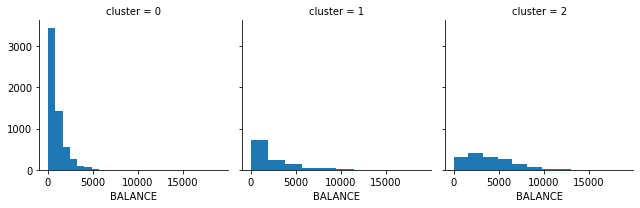

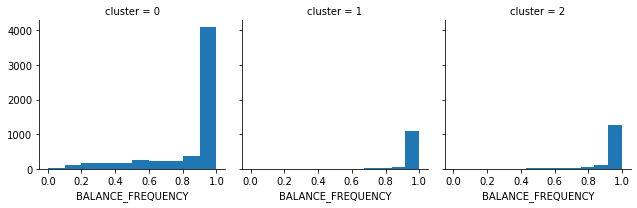

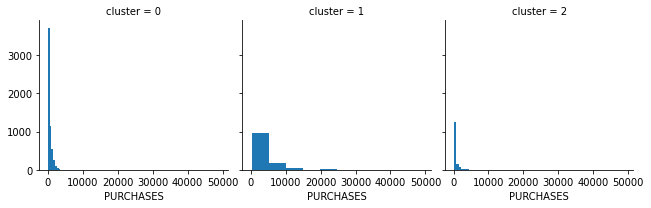

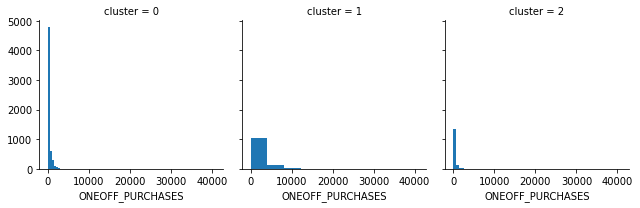

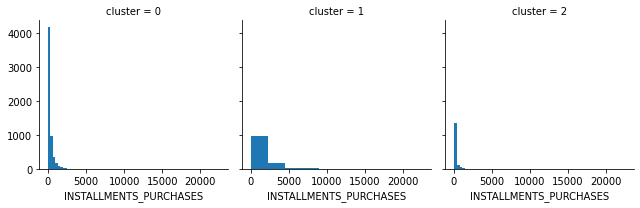

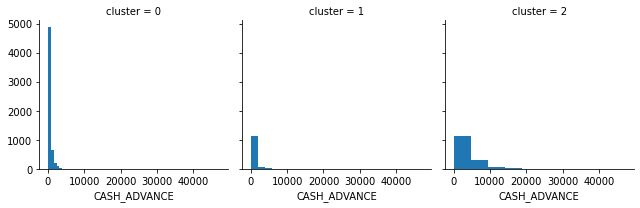

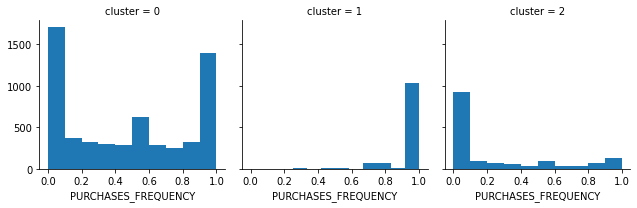

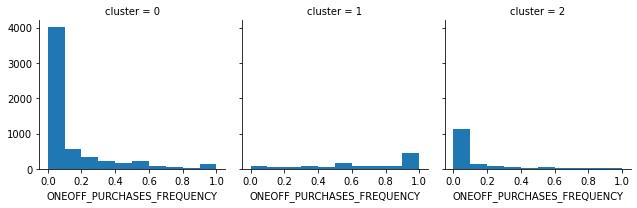

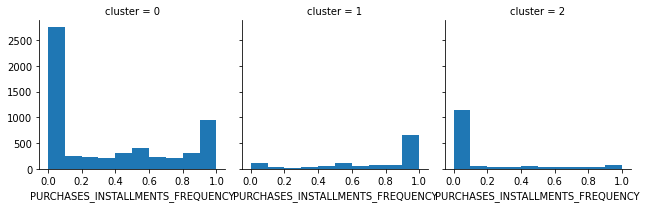

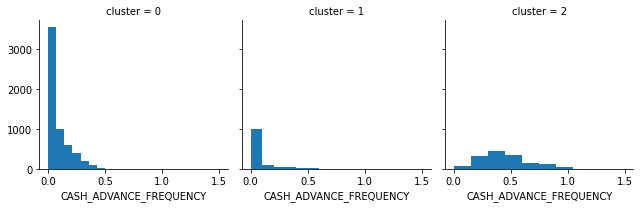

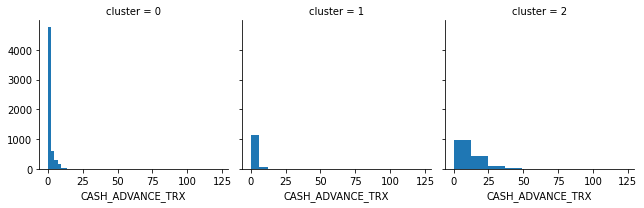

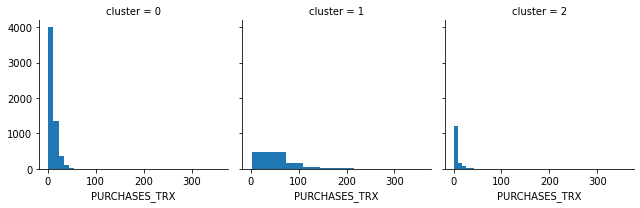

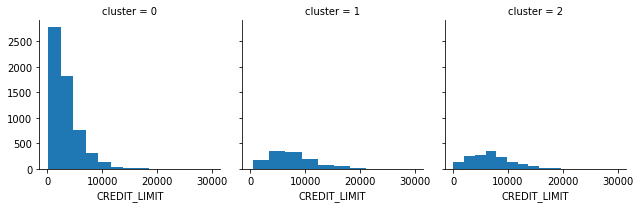

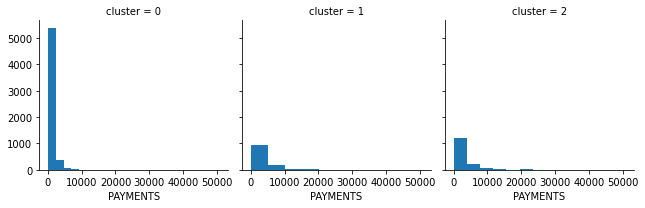

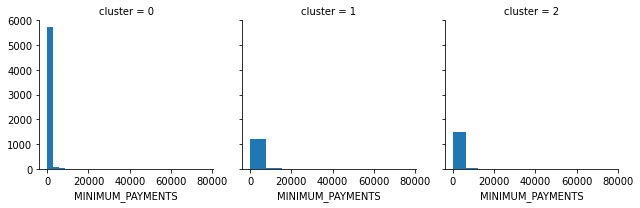

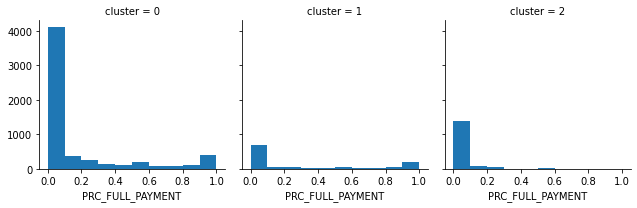

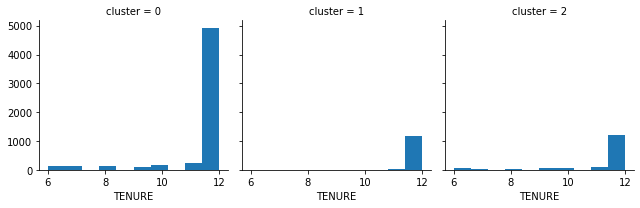

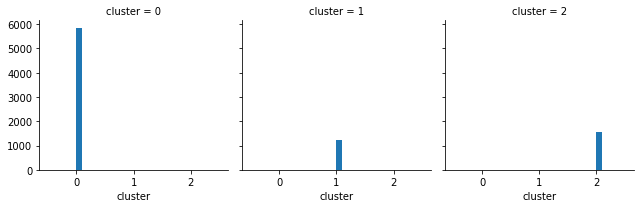

In [23]:
for i in res:
    grid = sns.FacetGrid(res, col='cluster')
    grid.map(plt.hist, i)